### Первый нотбук для обработки pandas

In [50]:
import pandas as pd

Читаем данные с csv файла

In [51]:
df = pd.read_csv('data/Cite_clicks_outliers.csv', index_col = 0)
print(df.head())

     SHOP1  SHOP2  SHOP3  SHOP4
day                            
1    319.0 -265.0  319.0  328.0
2    292.0    4.0  292.0  301.0
3    283.0  301.0  274.0  283.0
4    328.0  364.0  328.0    NaN
5    391.0  355.0  373.0  337.0


Строим графики, видим выпады

<Axes: xlabel='day'>

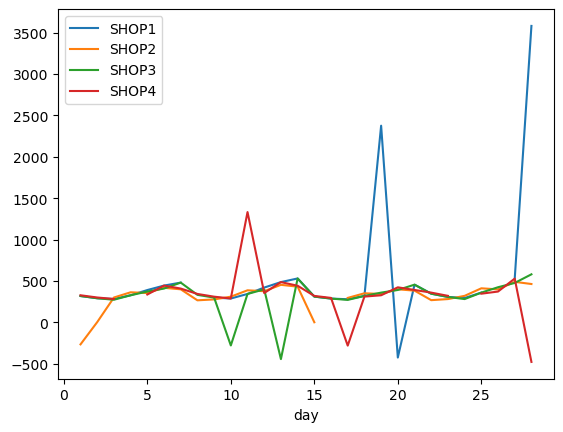

In [52]:
df.plot()

<Axes: xlabel='day'>

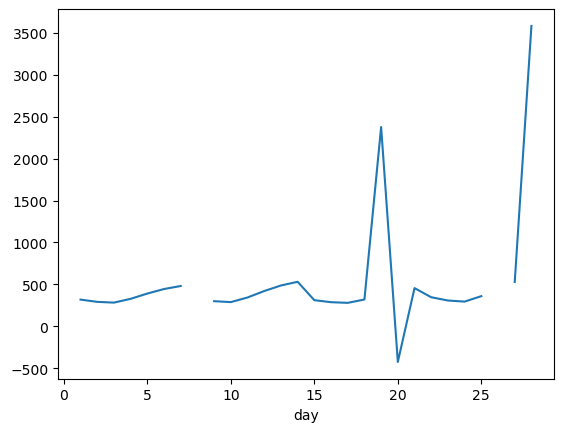

In [53]:
df['SHOP1'].plot()

Заполняем пропуски

In [54]:
df = df.fillna(df.mean().mean())
print(df.head())

     SHOP1  SHOP2  SHOP3       SHOP4
day                                 
1    319.0 -265.0  319.0  328.000000
2    292.0    4.0  292.0  301.000000
3    283.0  301.0  274.0  283.000000
4    328.0  364.0  328.0  377.342796
5    391.0  355.0  373.0  337.000000


Готовим маску для выпадов

In [63]:
mean_val = df.values.mean()
std_val = df.values.std()
mask = (df > 10) & (df < mean_val + std_val)

In [56]:
df = df.where(mask, mean_val)
print(df.head())

     SHOP1       SHOP2  SHOP3       SHOP4
day                                      
1    319.0  375.684946  319.0  328.000000
2    292.0  375.684946  292.0  301.000000
3    283.0  301.000000  274.0  283.000000
4    328.0  364.000000  328.0  377.342796
5    391.0  355.000000  373.0  337.000000


Получаем нормальный график, где можно увидеть периоды пиков в выходные дни

<Axes: xlabel='day'>

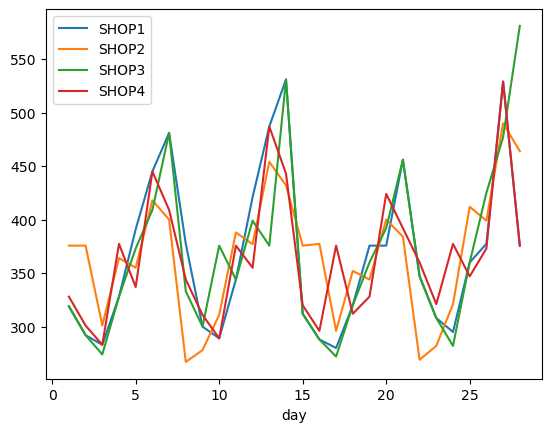

In [57]:
df.plot()

<Axes: xlabel='day'>

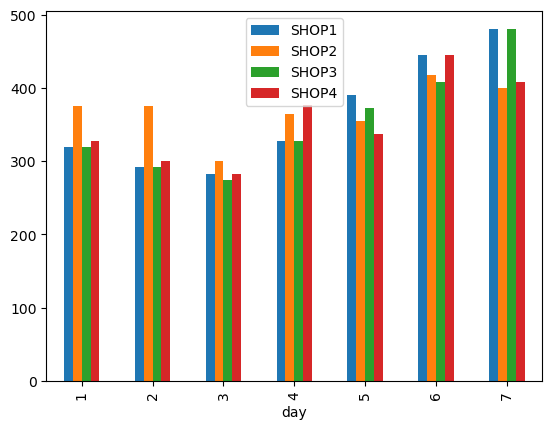

In [58]:

df[:7].plot(kind='bar', y=df.columns)

Суммарные знаечения по магазинам примерно равны

<Axes: >

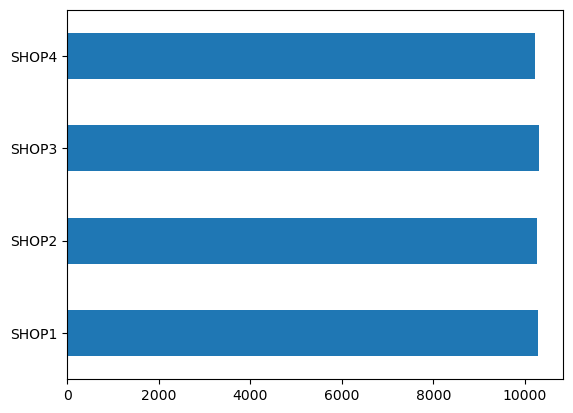

In [59]:
df.sum().plot(kind='barh')

<Axes: ylabel='Total clicks'>

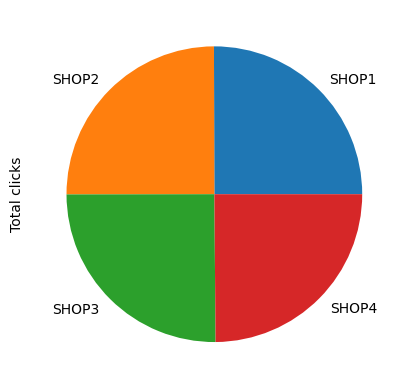

In [60]:
df.sum().plot(kind='pie', ylabel='Total clicks')

<Axes: xlabel='SHOP1', ylabel='SHOP2'>

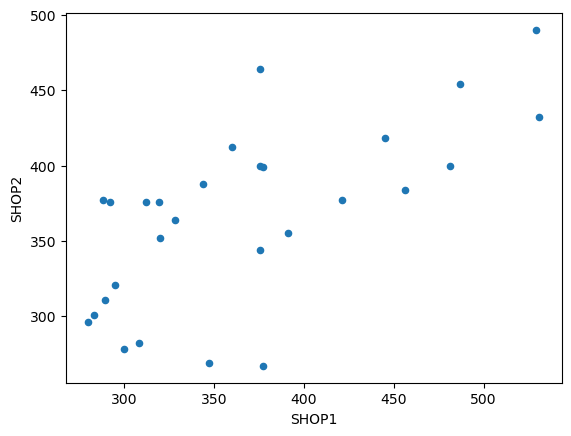

In [61]:
df.plot(x="SHOP1", y="SHOP2", kind="scatter")

Можно наблюдать линейную зависимость между первым и третьим магазином

<Axes: xlabel='SHOP1', ylabel='SHOP3'>

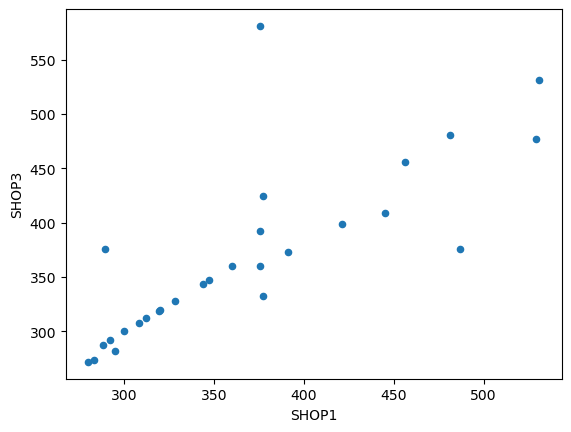

In [62]:
df.plot(x="SHOP1", y="SHOP3", kind="scatter")